<a href="https://colab.research.google.com/github/t4toast/sales-predict/blob/main/sands_sales_predict0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn

filename = '/content/drive/MyDrive/Colab Notebooks/sales_predictions.csv'
df = pd.read_csv(filename)


In [2]:
#How many rows and columns?
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [3]:
#What are the datatypes of each variable?
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [4]:
#Are there duplicates? If so, drop any duplicates.
df.drop_duplicates()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [ ]:
#Identify missing values
df[['Item_Weight', 'Outlet_Size']].info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Item_Weight  7060 non-null   float64
 1   Outlet_Size  6113 non-null   object 
dtypes: float64(1), object(1)
memory usage: 133.3+ KB


In [ ]:
dfIW = df[['Item_Weight']].mean()
dfIW

Item_Weight    12.857645
dtype: float64

In [ ]:
#replace NaN values with mean weight
df[['Item_Weight']].fillna(12.8)

,Item_Weight
0,9.300
1,5.920
2,17.500
3,19.200
4,8.930
...,...
8518,6.865
8519,8.380
8520,10.600
8521,7.210


In [ ]:
#replace NaN values with Medium because it is halfway betweem small and large
df[['Outlet_Size']].fillna('Medium')


,Outlet_Size
0,Medium
1,Medium
2,Medium
3,Medium
4,High
...,...
8518,High
8519,Medium
8520,Small
8521,Medium


In [ ]:
#Confirm that there are no missing values after addressing them.
df[['Item_Weight', 'Outlet_Size']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Item_Weight  7060 non-null   float64
 1   Outlet_Size  6113 non-null   object 
dtypes: float64(1), object(1)
memory usage: 133.3+ KB


In [ ]:
# Find and fix any inconsistent categories of data
df['Item_Fat_Content'].value_counts()


Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [ ]:
df['Item_Fat_Content'].replace(['LF', 'low fat', 'reg'],['Low Fat', 'Low Fat', 'Regular'])



0       Low Fat
1       Regular
2       Low Fat
3       Regular
4       Low Fat
         ...   
8518    Low Fat
8519    Regular
8520    Low Fat
8521    Regular
8522    Low Fat
Name: Item_Fat_Content, Length: 8523, dtype: object

In [ ]:
#For any numerical columns, obtain the summary statistics of each
df['Item_Weight'].min()

4.555

In [ ]:
df['Item_Weight'].max()

21.35

In [ ]:
df['Item_Weight'].mean()

12.857645184135976

In [ ]:
df['Item_MRP'].min()


31.29

In [ ]:
df['Item_MRP'].max()

266.8884

In [ ]:
df['Item_MRP'].mean()

140.9927819781767

In [ ]:
df['Item_Visibility'].min()

0.0

In [ ]:
df['Item_Visibility'].max()

0.328390948

In [ ]:
df['Item_Visibility'].mean()

0.06613202877895108

In [ ]:
df['Item_Outlet_Sales'].min()

33.29

In [ ]:
df['Item_Outlet_Sales'].max()

13086.9648

In [ ]:
df['Item_Outlet_Sales'].mean()

2181.288913575032

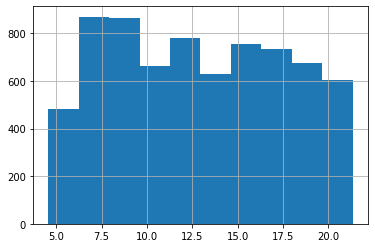

In [ ]:
#For Part3, your task is to complete any statistical analyses that might help you understand, explain, or model with your data. 
#This must include at least one of each:
#Histogram to view the distributions of various features in your dataset.

df['Item_Weight'].hist()
#graph answers how many small vs. medium vs. large stores there are

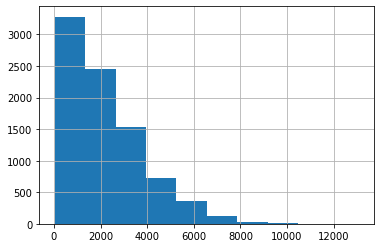

In [ ]:
df['Item_Outlet_Sales'].hist()
#to look at how much money was made per store

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


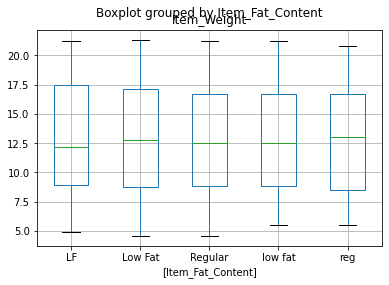

In [ ]:
#Boxplot to view statistical summaries of various features in your dataset.
df.boxplot(column = ['Item_Weight'], by = ['Item_Fat_Content'])




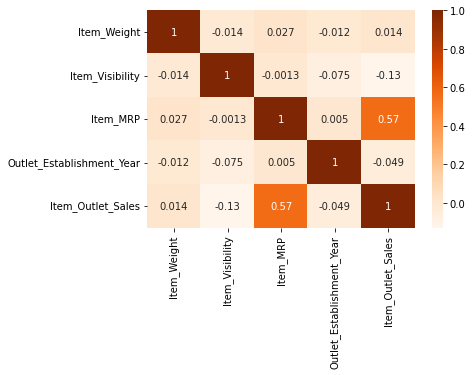

In [8]:
#Heatmap of the correlation between features.
corr = df.corr()
import seaborn as sns

sns.heatmap(corr, cmap = 'Oranges', annot=True)


In [5]:
#Create a minimum of two data visualizations that help others understand trends in the data (explanatory data analysis).
#Since these graphs are for reporting purposes, make sure they look nice by including titles, legends, etc.
df['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

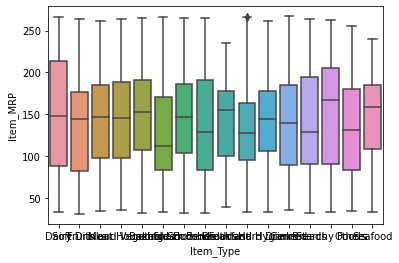

In [9]:
sns.boxplot(x='Item_Type', y='Item_MRP', data=df)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text major ticklabel objects>)

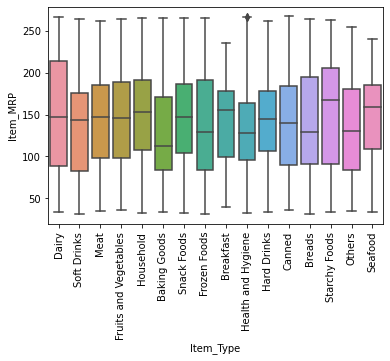

In [18]:
#The idea here is to show the distribution of the maximum retail price and how it relates to the item type. but we can't read the labels
sns.boxplot(x='Item_Type', y='Item_MRP', data=df)
plt.xticks(rotation = 90)



